In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopy.distance
from functools import partial
from shapely.geometry import Point
import json
from tqdm import tqdm

In [ ]:
df = pd.read_csv('/content/Combined_df.csv')
df['address'] = df['block'] + ' ' + df['street_name']

In [ ]:
def calc_dist(p1, p2):
  x1 = p1.x
  y1 = p1.y
  x2, y2 = p2.x, p2.y
  return geopy.distance.geodesic((y1, x1), (y2, x2)).km

In [ ]:
with open('/content/long_lat_hdb.json', 'r') as fp:
  long_lat_hdb_dict = json.load(fp)

with open('/content/sch_long_lat_by_level', 'r') as fp:
  long_lat_sch_dict = json.load(fp)

In [ ]:
good_pri = []
with open('/content/good_pri.txt', 'r') as fp:
    line = fp.readlines()
    good_pri = [row.strip('\n').upper() for row in line]

In [ ]:
elite_pri = []
with open('/content/elite_pri.txt', 'r') as fp:
    line = fp.readlines()
    elite_pri = [row.strip('\n').upper() for row in line]

In [ ]:
good_sec = []
with open('/content/good_sec.txt', 'r') as fp:
    line = fp.readlines()
    good_sec = [row.strip('\n').upper() for row in line]

In [ ]:
good_jc = []
with open('/content/good_jc.txt', 'r') as fp:
    line = fp.readlines()
    good_jc = [row.strip('\n').upper() for row in line]

In [ ]:
def get_dict(school, level):
    main = long_lat_sch_dict[level]
    output_dict = {}
    for s in school:
        coord = main.get(s, None)
        if(coord!=None):
            output_dict[s] = coord
        else:
            print(s)
    return output_dict

In [ ]:
def get_distance(output_dict):
    main = {}
    for key, _ in tqdm(long_lat_hdb_dict.items()):
      try:
        main[key] = {}
        p2 = Point(*long_lat_hdb_dict[key].values())
        calc_dist_partial = partial(calc_dist, p2 = p2)
        temp = {sch_name : calc_dist_partial(Point(*v1.values())) for sch_name, v1 in output_dict.items()}
        temp = sorted(temp.items(), key=lambda item: item[1])[0][1]
        main[key] = temp
      except Exception as e:
        print('ERROR', e)
    return main

In [ ]:
def add_column(main, name):
    dist = []
    for r in df.iterrows():
        row = r[1]
        d = main.get(row['address'], None)
        if(d==None):
            print(row['address'])
        else:
            dist.append(d)
    df[name] = dist

In [ ]:
add_column(get_distance(get_dict(good_pri, 'PRIMARY')), 'distance_to_good_pri')

100%|██████████| 9585/9585 [03:10<00:00, 50.42it/s]


In [ ]:
add_column(get_distance(get_dict(elite_pri, 'PRIMARY')), 'distance_to_elite_pri')

100%|██████████| 9585/9585 [01:36<00:00, 99.74it/s]


In [ ]:
add_column(get_distance(get_dict(good_sec, 'SECONDARY')), 'distance_to_good_sec')

100%|██████████| 9585/9585 [01:23<00:00, 115.46it/s]


In [ ]:
add_column(get_distance(get_dict(good_jc, 'JUNIOR COLLEGE')), 'distance_to_good_jc')

100%|██████████| 9585/9585 [00:18<00:00, 509.62it/s]


In [ ]:
df.columns

Index(['Unnamed: 0', 'month', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'adjusted_price', 'distance_to_mrt',
       'distance_to_park', 'distance_to_sports_facilities',
       'distance_to_primary_school', 'distance_to_secondary_school',
       'distance_to_junior_college', 'address', 'distance_to_good_pri',
       'distance_to_elite_pri', 'distance_to_good_sec', 'distance_to_good_jc'],
      dtype='object')

In [ ]:
df2 = df[['adjusted_price', 'distance_to_primary_school', 'distance_to_secondary_school',
       'distance_to_junior_college', 'distance_to_good_pri',
       'distance_to_elite_pri', 'distance_to_good_sec', 'distance_to_good_jc']]

<Axes: >

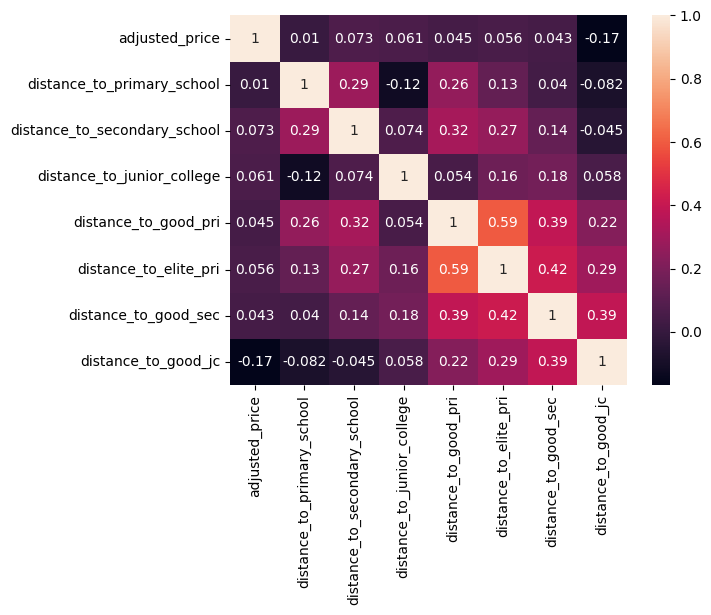

In [ ]:
sns.heatmap(df2.corr(), annot=True)

In [ ]:
df2['clustered_pri'] = pd.cut(df2['distance_to_primary_school'], bins=[-float('inf'), 1, 2, float('inf')], labels=['below_1', 'between_1_and_2', 'above_2'])
df2['clustered_good_pri'] = pd.cut(df2['distance_to_good_pri'], bins=[-float('inf'), 1, 2, float('inf')], labels=['below_1', 'between_1_and_2', 'above_2'])
df2['clustered_elite_pri'] = pd.cut(df2['distance_to_elite_pri'], bins=[-float('inf'), 1, 2, float('inf')], labels=['below_1', 'between_1_and_2', 'above_2'])
df2['clustered_good_sec'] = pd.cut(df2['distance_to_good_sec'], bins=[-float('inf'), 1, 2, float('inf')], labels=['below_1', 'between_1_and_2', 'above_2'])
df2['clustered_good_jc'] = pd.cut(df2['distance_to_good_jc'], bins=[-float('inf'), 1, 2, float('inf')], labels=['below_1', 'between_1_and_2', 'above_2'])

<ipython-input-104-0bfeaf284df8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clustered_pri'] = pd.cut(df2['distance_to_primary_school'], bins=[-float('inf'), 1, 2, float('inf')], labels=['below_1', 'between_1_and_2', 'above_2'])
<ipython-input-104-0bfeaf284df8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clustered_good_pri'] = pd.cut(df2['distance_to_good_pri'], bins=[-float('inf'), 1, 2, float('inf')], labels=['below_1', 'between_1_and_2', 'above_2'])
<ipython-input-104-0bfeaf284df8>:3:

<Axes: xlabel='adjusted_price', ylabel='clustered_pri'>

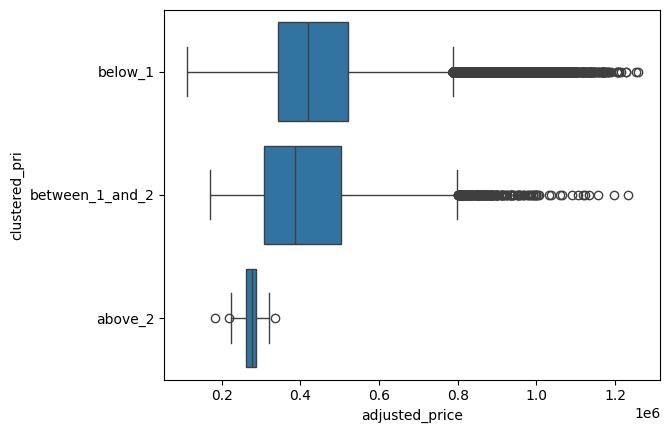

In [ ]:
sns.boxplot(data = df2, x = 'adjusted_price', y = 'clustered_pri')

<Axes: xlabel='adjusted_price', ylabel='clustered_good_pri'>

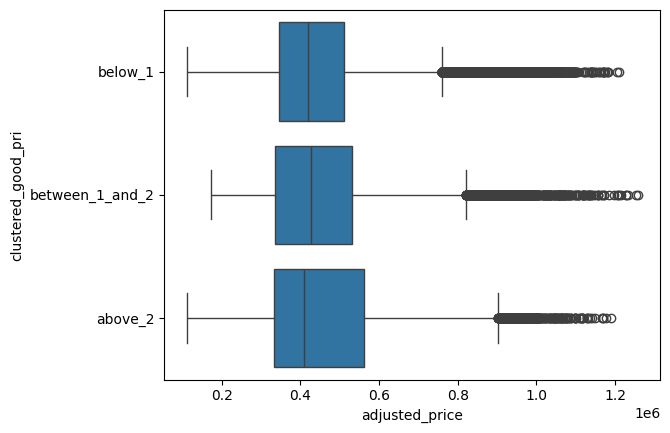

In [ ]:
sns.boxplot(data = df2, x = 'adjusted_price', y = 'clustered_good_pri')

<Axes: xlabel='adjusted_price', ylabel='clustered_elite_pri'>

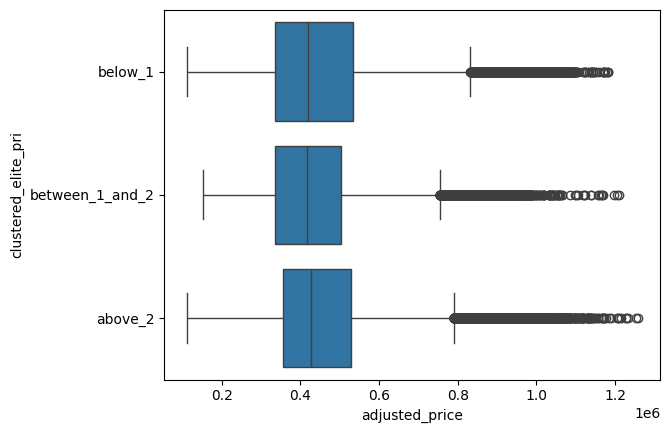

In [ ]:
sns.boxplot(data = df2, x = 'adjusted_price', y = 'clustered_elite_pri')

<Axes: xlabel='adjusted_price', ylabel='clustered_good_sec'>

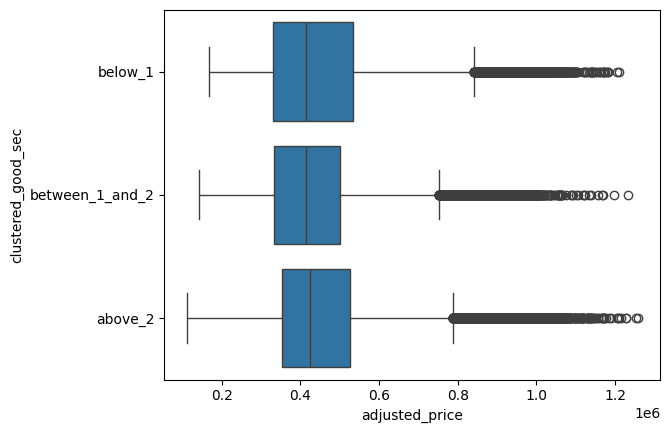

In [ ]:
sns.boxplot(data = df2, x = 'adjusted_price', y = 'clustered_good_sec')

<Axes: xlabel='adjusted_price', ylabel='clustered_good_jc'>

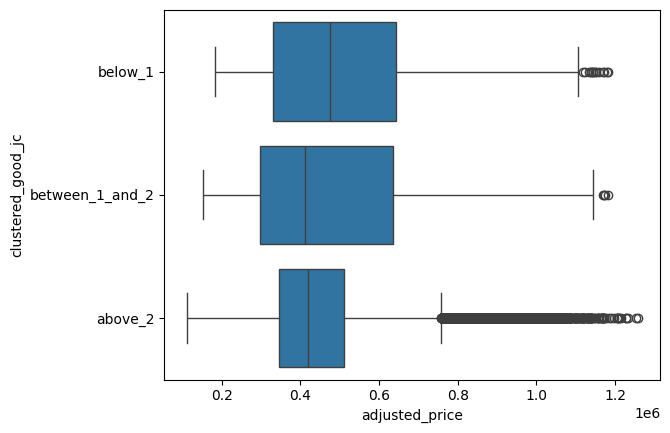

In [ ]:
sns.boxplot(data = df2, x = 'adjusted_price', y = 'clustered_good_jc')

Inspiration was drawn to cluster primary schools based on <1km, 1-2km, >2km since priority is given for balloting in that order

Results still show that distance to school may not be the most important feature for prediction given low correlation

Distance to good jc also looks like a good feature, with a negative corr as it should be and highest score compared to the rest